# Create a modified preferential attachment model that penalizes the age of a node

- Each time a new vertex is added, it creates m links to old ver- tices and the probability that an old vertex is cited depends on its degree (preferential attachment) and age. In particular, the
3
probability that a newly added vertex connects to an old vertex is proportional to:
P [i] ∼ (ckiα + a)(dliβ + b),
where ki is the degree of vertex i in the current time step, and li is the age of vertex i. Produce such an undirected network with 1000 nodes and parameters m = 1, α = 1,β = −1, and a = c = d = 1,b = 0. Plot the degree distribution. What is the power law exponent?

In [3]:
library('igraph')
library('Matrix')
library('pracma')

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“23 y values <= 0 omitted from logarithmic plot”

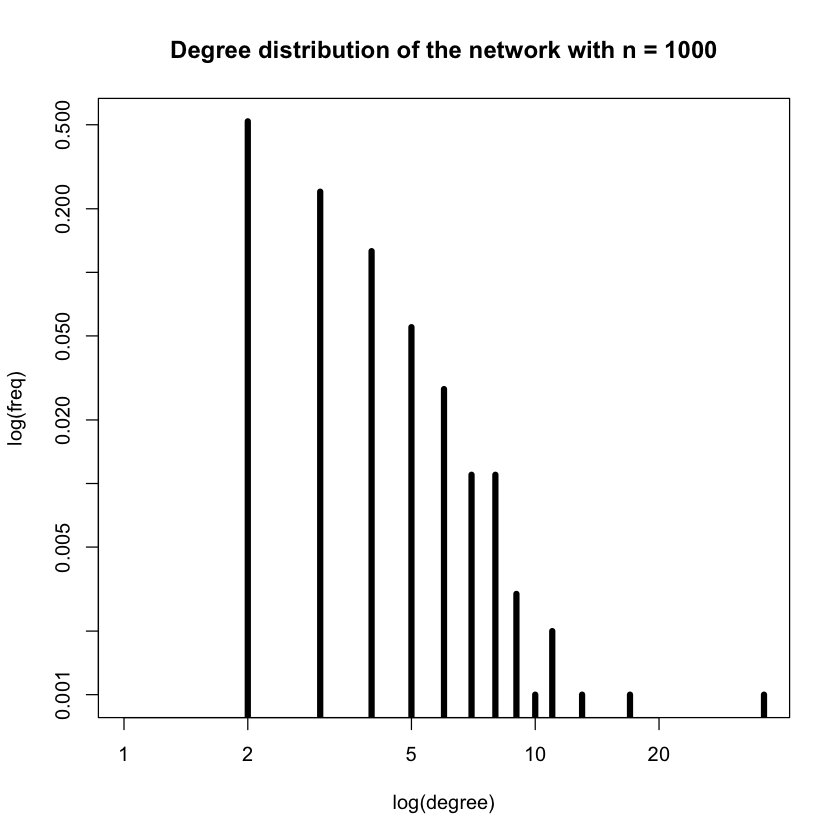

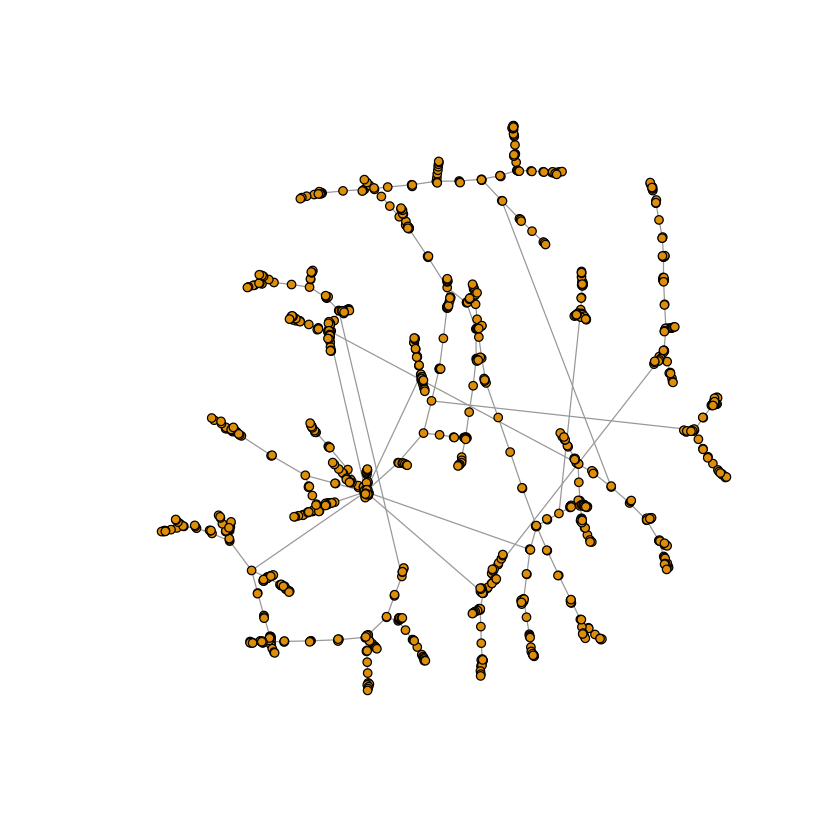

In [4]:
rm(list=ls()) # clear workspace
g <- sample_pa_age(1000, pa.exp = 1, aging.exp = -1, m = 1, directed = FALSE)
plot(degree.distribution(g),log='xy', type='h', lwd  = 5,
     xlab = "log(degree)",ylab = "log(freq)",main="Degree distribution of the network with n = 1000")
plot(g, vertex.size=3, vertex.label=NA)

In [5]:
deg <- degree.distribution(g)
deglog <- log(deg)
remove <- is.infinite(deglog)
deglog <- log(deg[!remove])
xlog <- 1:length(deg)
xlog <- log(xlog[!remove])
lm(deglog~xlog)


Call:
lm(formula = deglog ~ xlog)

Coefficients:
(Intercept)         xlog  
      1.031       -2.745  


- Use fast greedy method to find the community structure. What is the modularity?

In [6]:
fc <- cluster_fast_greedy(g)
modularity(fc)

[1] 0.9351138